<a href="https://colab.research.google.com/github/Shayankr/PyTorch_Basic_2_Advance/blob/master/PyTorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center>Building a Linear regression Model Using PyTorch<center>

In [ ]:
# Chcek whether GPU is activated or not?
!nvidia-smi

Fri Jan  6 20:41:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch

Set device on cpu or gpu, based on availability.
PyTorch works on gpu.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

In [ ]:
#Count the number of GPU available.
torch.cuda.device_count()

1

Create a simple problem for "Linear Regression".

In [ ]:
weights=0.7
bias =0.1

# y=mX+c
start=0
stop=1
step=0.02
#X = torch.tensor(torch.randn(5)).unsqueeze(dim=1)
X = torch.arange(start,stop,step).unsqueeze(dim=1)
y = weights*X + bias
X[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.1000],
         [0.1140],
         [0.1280],
         [0.1420],
         [0.1560],
         [0.1700],
         [0.1840],
         [0.1980],
         [0.2120],
         [0.2260]]))

In [ ]:
X.shape

torch.Size([50, 1])

In [ ]:
X.ndim

2

In [ ]:
X.size()

torch.Size([50, 1])

In [ ]:
len(X),len(y)

(50, 50)

Splitting the data in very general manner, we can use randomness in splitting using "sklearn.model_selection.train_test_split".

In [ ]:
# Splitting the data

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"len of X_train is: {len(X_train)}")
print(f"len of X_test is: {len(X_test)}")
print(f"len of y_train is: {len(y_train)}")
print(f"len of y_test is: {len(y_test)}")

len of X_train is: 40
len of X_test is: 10
len of y_train is: 40
len of y_test is: 10


In [ ]:
# We an use sklearn.model_selection.train_test_split .... for random splitting

importing some necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Define a plotting function, to use later after training (and testing).

In [ ]:
# visualize

def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=5, label="Training_Data")

  plt.scatter(test_data, test_labels, c="g", s=5, label="Testing_data")

  if predictions is not None:

    #plot the prediction plot

    plt.scatter(test_data, predictions, c="r", s=6, label="Predictions")

  plt.legend(prop={"size":14})



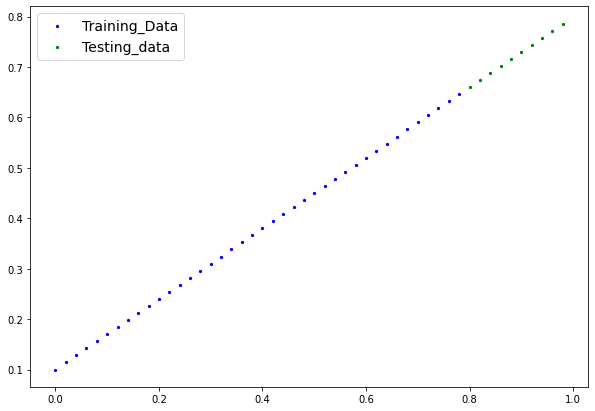

In [ ]:
plot_predictions()

Chcek the parameters of the plotting function.

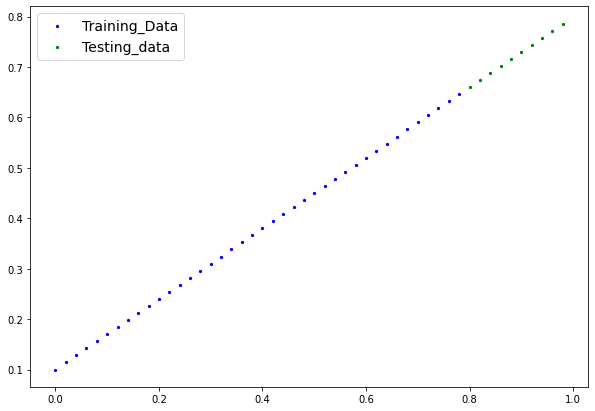

In [ ]:
plot_predictions(X_train,y_train, X_test, y_test)

## Building Model

In [ ]:
from torch import nn

Creating the <I><b>LinearRegression</b></I> function using<b> "nn.Module"</b>.

*Define the parameters by "self*". `later, I will use "nn.Linear"`

In [ ]:
# create a linear model by subclassing nn.module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=float))

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=float))

  def forward(self, x:torch.tensor)-> torch.tensor:
    return self.weights*x+self.bias

In [ ]:
# Try later to use manual seed -- to decrease the randomness in random.

In [ ]:
torch.manual_seed = 42
# -- torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())
model_0.state_dict()

OrderedDict([('weights', tensor([0.6174], dtype=torch.float64)),
             ('bias', tensor([0.8371], dtype=torch.float64))])

In [ ]:
model_0.parameters()

<generator object Module.parameters at 0x7f43ca54ff20>

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6174], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.8371], dtype=torch.float64, requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6174], dtype=torch.float64)),
             ('bias', tensor([0.8371], dtype=torch.float64))])

In [ ]:
# make predictions with model:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.3311],
        [1.3434],
        [1.3558],
        [1.3681],
        [1.3805],
        [1.3928],
        [1.4052],
        [1.4175],
        [1.4299],
        [1.4422]], dtype=torch.float64)

In [ ]:
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds

tensor([[1.3311],
        [1.3434],
        [1.3558],
        [1.3681],
        [1.3805],
        [1.3928],
        [1.4052],
        [1.4175],
        [1.4299],
        [1.4422]], dtype=torch.float64)

## Train Model:

In [ ]:
# Loss funcion
# Optimizer
# loopo (training and tetsing)

In [ ]:
# Set-up loss function.
loss_fn = nn.L1Loss()

In [ ]:
#setup an opimizer
optimizers = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.05,)
#leraning_rate -- is  a hyperparameter.

Whole Complete Training Loop:

In [ ]:
#looping
epochs=200

#Take different values
epoch_counts=[]
loss_values=[]
test_loss_values=[]

# 0.Iterate over loop(#epochs)
for epoch in range(epochs):
  model_0.train()

  #1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Caluclate the loss
  loss = loss_fn(y_pred,y_train)
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizers.zero_grad()

  # 4. Perform Backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizers.step()


  # TESTING
  model_0.eval()  #Turn model into evaluation mode.

  # with torch.no_grad():
  with torch.inference_mode():
    # 1. Do theforward pass
    test_pred = model_0(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening:
  if (epoch%10==0):
    epoch_counts.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test_Loss: {test_loss}")  

    print(model_0.state_dict())

Loss: 0.7049081419176918
Epoch: 0 | Loss: 0.7049081419176918 | Test_Loss: 0.5962778515569476
OrderedDict([('weights', tensor([0.5979], dtype=torch.float64)), ('bias', tensor([0.7871], dtype=torch.float64))])
Loss: 0.6473031422358687
Loss: 0.5896981425540458
Loss: 0.5320931428722228
Loss: 0.4744881431903997
Loss: 0.41688314350857675
Loss: 0.3592781438267537
Loss: 0.30167314414493085
Loss: 0.24406814446310787
Loss: 0.18646314478128492
Loss: 0.12885814509946197
Epoch: 10 | Loss: 0.12885814509946197 | Test_Loss: 0.07727214667223574
OrderedDict([('weights', tensor([0.4029], dtype=torch.float64)), ('bias', tensor([0.2871], dtype=torch.float64))])
Loss: 0.08077435890468766
Loss: 0.06678364129732009
Loss: 0.06251803168934618
Loss: 0.06001130004467805
Loss: 0.05802181905619473
Loss: 0.05625776912454861
Loss: 0.05449371919290245
Loss: 0.05276623799284517
Loss: 0.051048669339336536
Loss: 0.04934023816010885
Epoch: 20 | Loss: 0.04934023816010885 | Test_Loss: 0.11110514762827206
OrderedDict([('weig

Plotting the loss curve for training and testing"

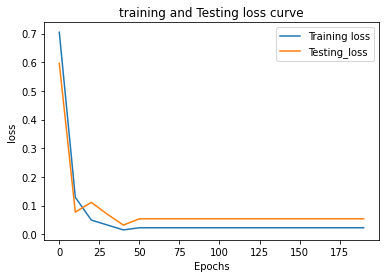

In [ ]:
#from prompt_toolkit.shortcuts.dialogs import Label
# Plottinf the loss curve:

plt.plot(epoch_counts, torch.tensor(loss_values).cpu(), label="Training loss")
plt.plot(epoch_counts, torch.tensor(test_loss_values).cpu(), label='Testing_loss')

plt.title("training and Testing loss curve")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

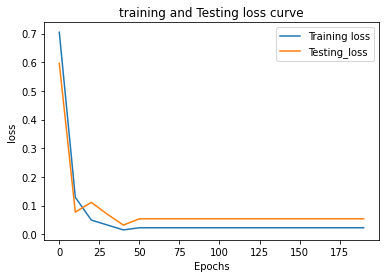

In [ ]:
#from prompt_toolkit.shortcuts.dialogs import Label
# Plotting the loss curve:

plt.plot(epoch_counts, torch.tensor(loss_values).numpy(), label="Training loss")
plt.plot(epoch_counts, torch.tensor(test_loss_values).numpy(), label='Testing_loss')

plt.title("training and Testing loss curve")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

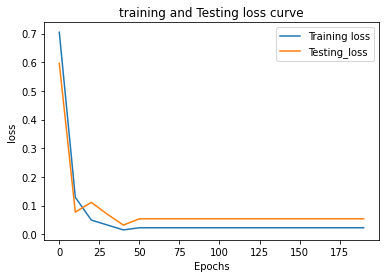

In [ ]:
#from prompt_toolkit.shortcuts.dialogs import Label
# Plottinf the loss curve:

plt.plot(epoch_counts, np.array(torch.tensor(loss_values)), label="Training loss")
plt.plot(epoch_counts, np.array(torch.tensor(test_loss_values)), label='Testing_loss')

plt.title("training and Testing loss curve")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## Define Linear Model by Using "nn.Linear()"

In [ ]:
# def LinearRegressionModelV2 by using subclassing of nn.module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # use nn.Linear() for creating the model parameters / also called: linear Transform, Probling layer.
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

# # set the manual seed
# torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.3295]])),
              ('linear_layer.bias', tensor([-0.2132]))]))

In [ ]:
seed=42
torch.cuda.manual_seed_all(seed)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.6945]])),
              ('linear_layer.bias', tensor([-0.6344]))]))

In [ ]:
model_0

LinearRegressionModel()

In [ ]:
torch.device

torch.device

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
device

'cuda'

In [ ]:
# set the model to use the targert device

model_1.to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

### Training

For training we need:
* Loss FUnction
* Optimizer
* Training Loop
* Testing loop

In [ ]:
# Set up loss functiom

loss_fn  = nn.L1Loss() #MAE

#set up optimizer
optimizer= torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
# Let's write a training loop
#torch.manual_seed(42)

epochs=200

# Put data on the target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


# 0.Iterate over loop(#epochs)
for epoch in range(epochs):
  model_1.train()

  #1. Forward Pass
  y_pred = model_1(X_train)

  # 2. Caluclate the loss
  loss = loss_fn(y_pred,y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform Backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  # TESTING
  model_1.eval()  #Turn model into evaluation mode.

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening:
  if (epoch%10==0):
    print(f"Epoch: {epoch} | Loss: {loss} | Test_Loss: {test_loss}")  

Epoch: 0 | Loss: 1.2783039808273315 | Test_Loss: 1.9621065855026245
Epoch: 10 | Loss: 1.1630940437316895 | Test_Loss: 1.8273967504501343
Epoch: 20 | Loss: 1.047884225845337 | Test_Loss: 1.692686915397644
Epoch: 30 | Loss: 0.93267422914505 | Test_Loss: 1.5579770803451538
Epoch: 40 | Loss: 0.8174643516540527 | Test_Loss: 1.4232672452926636
Epoch: 50 | Loss: 0.7022542953491211 | Test_Loss: 1.2885572910308838
Epoch: 60 | Loss: 0.587044358253479 | Test_Loss: 1.153847336769104
Epoch: 70 | Loss: 0.4718343913555145 | Test_Loss: 1.0191373825073242
Epoch: 80 | Loss: 0.36791038513183594 | Test_Loss: 0.8915075659751892
Epoch: 90 | Loss: 0.2976911664009094 | Test_Loss: 0.7849100232124329
Epoch: 100 | Loss: 0.25151097774505615 | Test_Loss: 0.6967170834541321
Epoch: 110 | Loss: 0.22140292823314667 | Test_Loss: 0.6249094009399414
Epoch: 120 | Loss: 0.2022647112607956 | Test_Loss: 0.5677004456520081
Epoch: 130 | Loss: 0.18952135741710663 | Test_Loss: 0.521136462688446
Epoch: 140 | Loss: 0.1808320879936

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0701]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4121], device='cuda:0'))])

In [ ]:
weights, bias

(0.7, 0.1)

In [ ]:
# Turn model into Evaluation Mode:
model_1.eval()

# MAke Predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.3560],
        [0.3546],
        [0.3532],
        [0.3518],
        [0.3503],
        [0.3489],
        [0.3475],
        [0.3461],
        [0.3447],
        [0.3433]], device='cuda:0')

In [ ]:
y_preds.cpu()

tensor([[0.3560],
        [0.3546],
        [0.3532],
        [0.3518],
        [0.3503],
        [0.3489],
        [0.3475],
        [0.3461],
        [0.3447],
        [0.3433]])

In [ ]:
a=y_preds.cpu().numpy()

In [ ]:
a

array([[0.35595897],
       [0.35455623],
       [0.35315347],
       [0.3517507 ],
       [0.35034794],
       [0.3489452 ],
       [0.34754243],
       [0.34613967],
       [0.34473693],
       [0.34333417]], dtype=float32)

In [ ]:
type(a)

numpy.ndarray

In [ ]:
# # Put data on the target device
# X_train = X_train.to(device)
# X_test = X_test.to(device)
# y_train = y_train.to(device)
# y_test = y_test.to(device)
# plot_predictions(predictions=a)

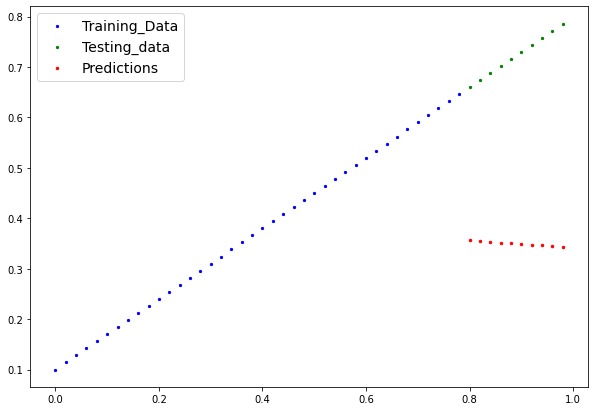

In [ ]:
plot_predictions(train_data=X_train.cpu(), train_labels=y_train.cpu(), test_data=X_test.cpu(), test_labels=y_test.cpu(), predictions=y_preds.cpu())

In [ ]:
# Saving and Loading a training model:

from pathlib import Path

# 1. Create model directory:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "Linear_reg_model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#MODEL_SAVE_PATH

# 3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(), 
           f = MODEL_SAVE_PATH)

Saving model to: models/Linear_reg_model.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0701]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4121], device='cuda:0'))])

In [ ]:
# Load a PyTorch Model:

# Create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(f="/content/models/Linear_reg_model.pth"))  #f=MODEL_SAVE_PATH

# Put the loaded model to device:
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1163 Jan  6 20:47 Linear_reg_model.pth


In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0701]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4121], device='cuda:0'))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [ ]:
#NEXT NOTEBOOK